Height: 91 Width: 600
0 23559


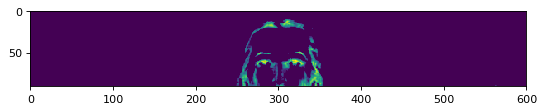

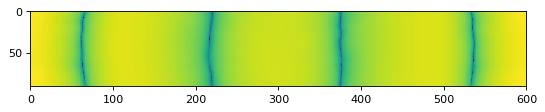

Height: 91 Width: 600
6000 23443


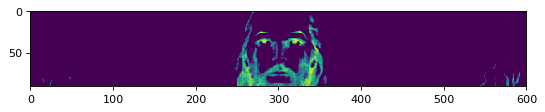

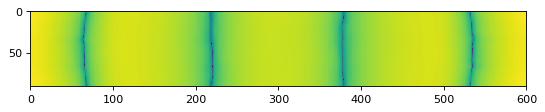

Height: 91 Width: 600
45600 23452


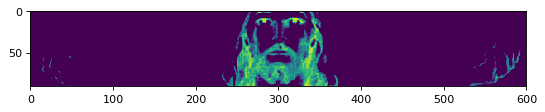

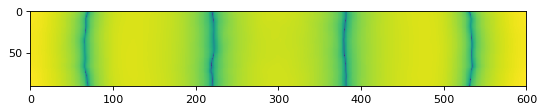

Height: 91 Width: 600
30600 23518


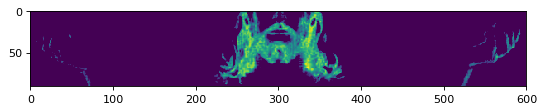

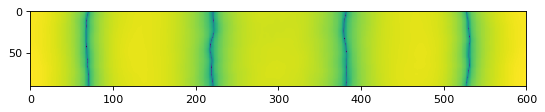

Height: 91 Width: 600
34199 23402


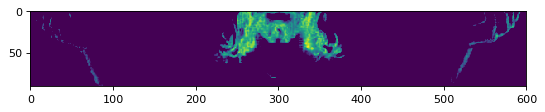

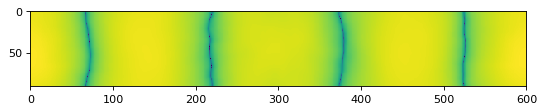

Height: 91 Width: 600
22200 23454


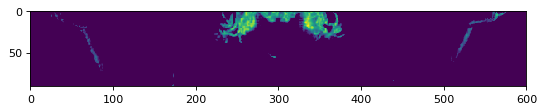

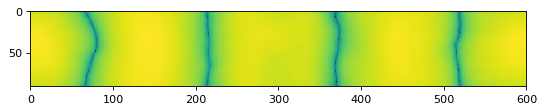

Height: 91 Width: 600
24260 23980


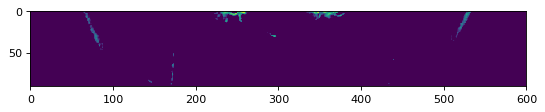

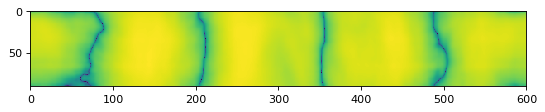

Height: 91 Width: 600
483 23977


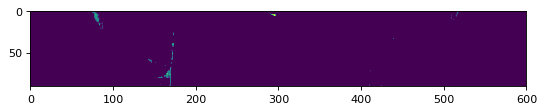

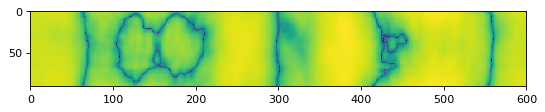

Height: 91 Width: 600
465 24058


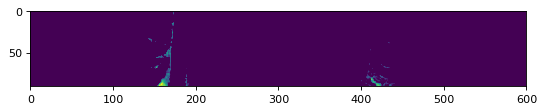

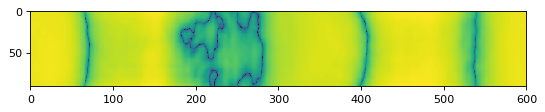

Height: 91 Width: 600
448 23759


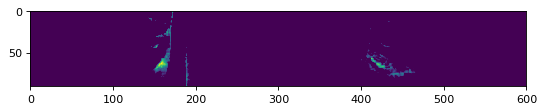

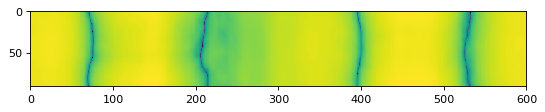

Height: 91 Width: 600
40062 24024


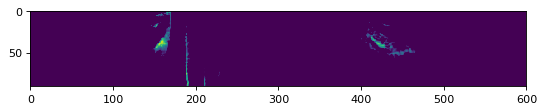

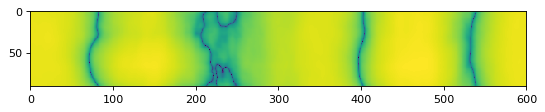

Height: 91 Width: 600
23878 23749


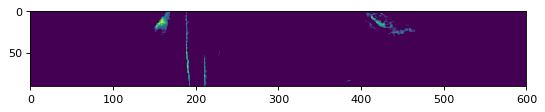

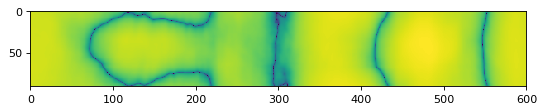

Height: 91 Width: 600
16086 23749


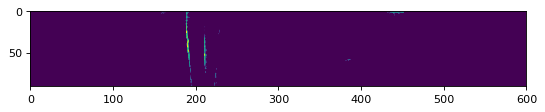

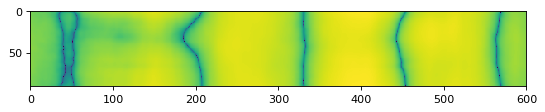

Height: 91 Width: 600
273 23741


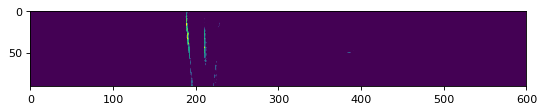

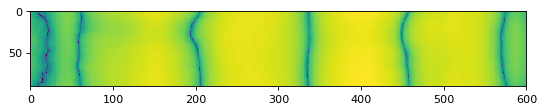

Height: 91 Width: 600
273 23741


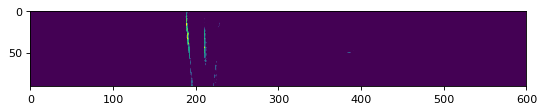

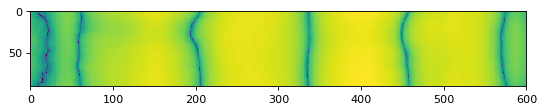

Height: 91 Width: 600
273 23741


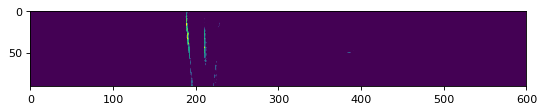

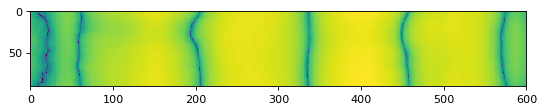

NameError: name 'xarea' is not defined

In [43]:
import os, sys, time
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import itertools as itr
from scipy import fftpack, ndimage
from scipy.misc import imread
from scipy.signal.signaltools import correlate2d as cor2d


def do_grayscale(imgarr):
    if len(imgarr.shape) == 3:
        return sp.average(imgarr, -1)
    else:
        return imgarr
    
def do_imzncc(ipath):
    imgdata = ndimage.imread(ipath, flatten=True)
    zndata = (imgdata - imgdata.mean())/ imgdata.std()
    return zndata
    
def do_imgfft2(ipath):
    imgdata = ndimage.imread(ipath, flatten=True)
    fft2dat = fftpack.fft2(imgdata)
    return fft2dat

def do_znccfft2(ipath):
    imgdata = ndimage.imread(ipath, flatten=True)
    zndata = (imgdata - imgdata.mean())/ imgdata.std()
    fft2dat = fftpack.fft2(zndata)
    return fft2dat
    
def doplt(ifftdata):
#     plt.imshow(20*np.log10(abs(ifftdata)))
    from matplotlib.colors import LogNorm
    plt.figure(figsize=(8, 6), dpi=80)
    plt.imshow(np.abs(ifftdata), norm=LogNorm(vmin=2))
#     plt.colorbar()
    plt.show()
    
def fft2_crosscor(imgx_dat, imgy_dat):
    """ Assume imgx_dat is always going to be the bigger image, area wise"""
    imgx_dim = imgx_dat.shape
    imgy_dim = imgy_dat.shape
    ixd, iyd = imgx_dim, imgy_dim
    xht = ixd[0] # heigth 
    xwd = ixd[1] # width
    yht = iyd[0] # h
    ywd = iyd[1] # w

    if xht > yht and xwd == ywd:
        pass
    elif xwd > ywd and xht == yht:
        pass
    elif xht > yht and xwd > ywd:
        pass
    
    divn = 4*(ixd[0]//iyd[0])
    stepd = int(ixd[0]/divn)
    
    for i in range(0, divn):
        highs = 0
        if i*stepd + iyd[0] < ixd[0]:
            highs = i*stepd + iyd[0]
            mins = i*stepd
        else:
            highs = ixd[0]
            mins = ixd[0] - iyd[0]
        ixloc = imgx_dat[mins:highs][:]
        print("Height:", ixloc.shape[0], "Width:", ixloc.shape[1])
        img_product = fftpack.fft2(ixloc) * fftpack.fft2(imgy_dat).conj()
        t_prod = fftpack.fft(np.transpose(ixloc))*fftpack.fft2(np.transpose(imgy_dat)).conj()
        inv_tprod = fftpack.ifft2(t_prod)
        inv_prod = fftpack.ifft2(img_product)
        inv_prod.shape
        print(np.argmax(inv_prod), np.argmax(inv_tprod))
        doplt(ixloc)
        doplt(inv_prod)
    if xarea > yarea:
        if ixd[0] > iyd[0]:
            if ixd[1] == iyd[1]:
                pass
            else:
                pass
        elif ixd[1] > iyd[1]:
            pass
#     img_product = fftpack.fft2(imgx_dat) * fftpack.fft2(imgy_dat).conj()
#     cc_image = fftpack.ifft2(img_product)
#     cc_image.shape()
#     image_product = np.fft.fft2(image) * np.fft.fft2(offset_image).conj()


    
timgpath = "/Users/vkorotki/Movies/Utils/img-check-subset/Testing/"
timg1 = timgpath + 'jesusc8.jpg'
timg2 = timgpath + 'jc8slice8.jpg'
timg3 = timgpath + 'jc8slice8cut.jpg'

# arg_lt = [timg1, timg2, timg3]
arg_lt = [timg1, timg2]
# narg = [do_imgfft2(ix) for ix in arg_lt]
narg = [do_imzncc(ix) for ix in arg_lt]
barg = [do_znccfft2(ix) for ix in arg_lt]
acombs = list(itr.combinations(list(range(0,len(arg_lt))),2))
for ac in acombs:
    fft2_crosscor(narg[ac[0]],narg[ac[1]])

    
# for xdat in narg:
#     xc2d = cor2d(xdat, xdat, mode='same')
#     print(xc2d.max())
#     xdot = np.dot(xdat, xdat.T)
#     print(np.average(np.abs(xdot)))
#     doplt(xdat)
print("\n")
# for bdat in barg:
#     xc2d = cor2d(bdat, bdat, mode='same')
#     print(xc2d.max())
#     doplt(bdat)
    
 # normalize per http://en.wikipedia.org/wiki/Cross-correlation


